<a href="https://colab.research.google.com/github/juaniitalbot/DataScienceEntregas/blob/main/Preentrega2_JuanTalbotSchiaffino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#I. LIBRERIAS

In [ ]:
# Importo librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Concecto el notebook con Google Drive
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# II. Abstract

Este proyecto va dirigido a empresas que se dediquen a la venta de autos nuevos o usados. Con este proyecto se le facilitaria el trabajo a la hora de poner un precio a los autos que tengan en venta ya que el modelo que voy a trabajar tiene en cuenta las caracteristicas de los autos para fijarle un precio.

Al ser un proyecto que se puede implementar desde en una empresa grande hasta en una empresa de solo una persona no esta dirijido a ningun area en especial.

El porque decidi trabajar estos datos creo yo que es por la versatilad que puede tener un modelo asi en diferentes topicos. Es decir, en este caso trabajo con autos y es algo que se puede aplicar facilmente a la realidad, pero tambien se podria ajustar a, por ejemplo, inmuebles y funcionaria. Eso hace que sea un proyecto que me llame mucho la atencion

# III. Data Acquisition


In [ ]:
carsDF =  pd.read_csv('/content/gdrive/MyDrive/Vehicle price prediction Project/CarsDataset.csv', sep = ',')

In [ ]:
carsDF

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [ ]:
carsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


#IV. Data Wrangling

Elimino la columna torque ya que es un dato que no infiere en nada y solo complica el dataframe

In [ ]:
carsDF = carsDF.drop(columns=['torque'], axis=1)

In [ ]:
carsDF.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

'milage', 'engine', 'max_power', 'torque', 'seats' poseen datos nulos por lo que veo conventiente eliminar esas filas ya que son pocas y no van a afectar el modelo de manera significante

In [ ]:
carsDF = carsDF.dropna()
carsDF = carsDF.drop_duplicates()

In [ ]:
carsDF.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [ ]:
carsDF['seller_type'].nunique()

3

In [ ]:
carsDF['transmission'].nunique()

2

In [ ]:
carsDF['owner'].nunique()

5

In [ ]:
carsDF['name'].nunique()

1983

'name' contiene muchos nombres diferentes por lo que es mejor eliminar la columna ya que no va a tener inferencia en el modelo

In [ ]:
carsDF = carsDF.drop(columns=['name'], axis=1)

In [ ]:
carsDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6718 entries, 0 to 8125
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6718 non-null   int64  
 1   selling_price  6718 non-null   int64  
 2   km_driven      6718 non-null   int64  
 3   fuel           6718 non-null   object 
 4   seller_type    6718 non-null   object 
 5   transmission   6718 non-null   object 
 6   owner          6718 non-null   object 
 7   mileage        6718 non-null   object 
 8   engine         6718 non-null   object 
 9   max_power      6718 non-null   object 
 10  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 629.8+ KB


In [ ]:
carsDF['fuel'].nunique()

4

In [ ]:
carsDF['seats'].nunique()

9

In [ ]:
carsDF['mileage']=carsDF['mileage'].replace(' kmpl','',regex=True).str.replace(',', '')
carsDF['mileage']=carsDF['mileage'].replace(' km/kg','',regex=True).str.replace(',', '')
carsDF['engine']=carsDF['engine'].replace(' CC','',regex=True).str.replace(',', '')
carsDF['max_power']=carsDF['max_power'].replace(' bhp','',regex=True).str.replace(',', '')

carsDF['mileage'] = pd.to_numeric(carsDF['mileage'])
carsDF['engine'] = pd.to_numeric(carsDF['engine'])
carsDF['max_power'] = pd.to_numeric(carsDF['max_power'])

In [ ]:
carsDF

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8121,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5.0
8122,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,5.0
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0


## Análisis

In [ ]:
carsDF.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,6718.000000,6.718000e+03,6.718000e+03,6718.00000,6718.000000,6717.000000,6718.000000
mean,2013.609110,5.263196e+05,7.340230e+04,19.46531,1430.891337,87.766100,5.434653
std,3.900648,5.235398e+05,5.869980e+04,4.04915,493.493277,31.724555,0.984230
min,1994.000000,2.999900e+04,1.000000e+00,0.00000,624.000000,32.800000,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,16.80000,1197.000000,67.100000,5.000000
50%,2014.000000,4.200000e+05,6.822150e+04,19.44000,1248.000000,81.830000,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,22.50000,1498.000000,100.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.00000,3604.000000,400.000000,14.000000


En este caso el .describe() no nos dice nada ya que muchos de los datos son tipo objeto, por ende, vamos a tener que encodearlos posteriormente

## Visualizaciones

In [ ]:
fuel_type = carsDF['fuel']
seller_type = carsDF['seller_type']
transmission_type = carsDF['transmission']
selling_price = carsDF['selling_price']
owner = carsDF['owner']

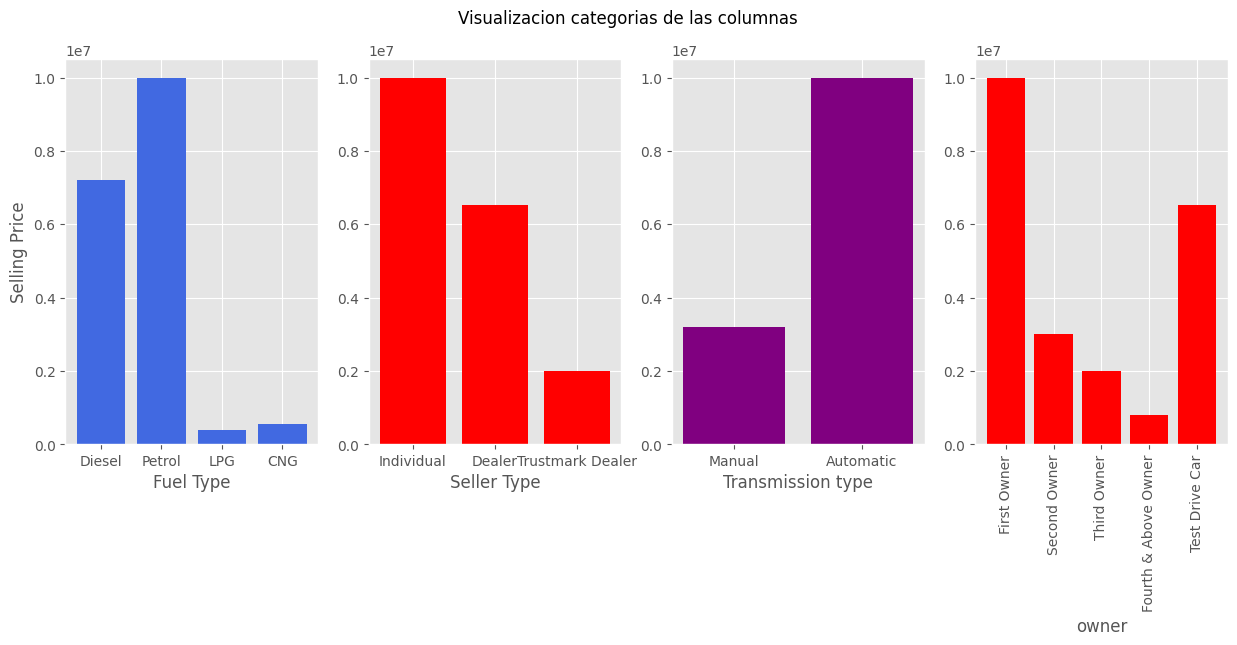

In [ ]:
from matplotlib import style

style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizacion categorias de las columnas')
plt.subplot(1,4,1)
plt.bar(fuel_type,selling_price, color='royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,4,2)
plt.bar(seller_type, selling_price, color='red')
plt.xlabel("Seller Type")
plt.subplot(1,4,3)
plt.bar(transmission_type, selling_price, color='purple')
plt.xlabel('Transmission type')
plt.subplot(1,4,4)
plt.bar(owner, selling_price, color='red')
plt.xticks(rotation=90)
plt.xlabel('owner')
plt.show()

Text(0.5, 0, 'Selling_Price')

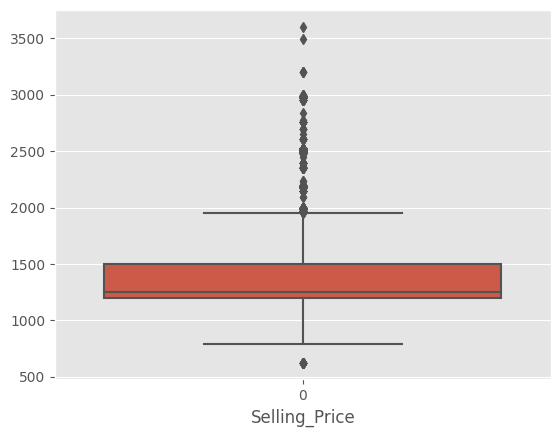

In [ ]:
sns.boxplot(carsDF['engine'])
plt.xlabel('Selling_Price')

Text(0.5, 0, 'Selling_Price')

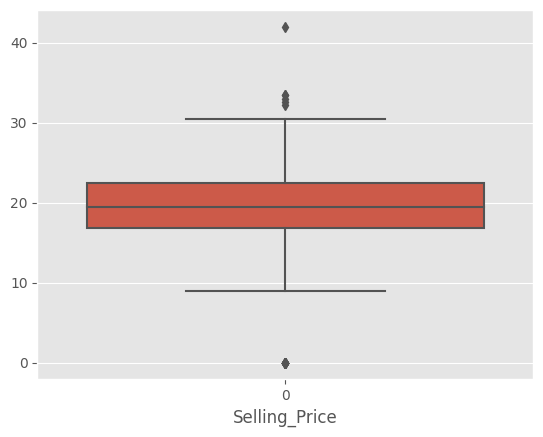

In [ ]:
sns.boxplot(carsDF['mileage'])
plt.xlabel('Selling_Price')

Text(0.5, 0, 'Selling_Price')

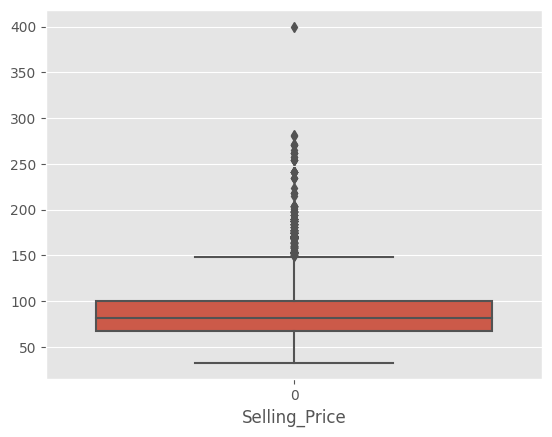

In [ ]:
sns.boxplot(carsDF['max_power'])
plt.xlabel('Selling_Price')

Text(0.5, 0, 'Selling_Price')

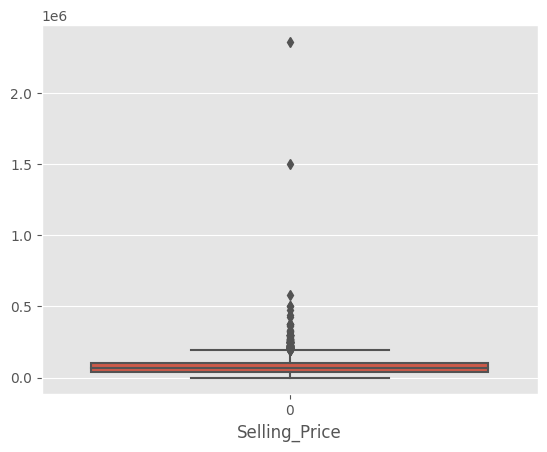

In [ ]:
sns.boxplot(carsDF['km_driven'])
plt.xlabel('Selling_Price')

Text(0.5, 0, 'Selling_Price')

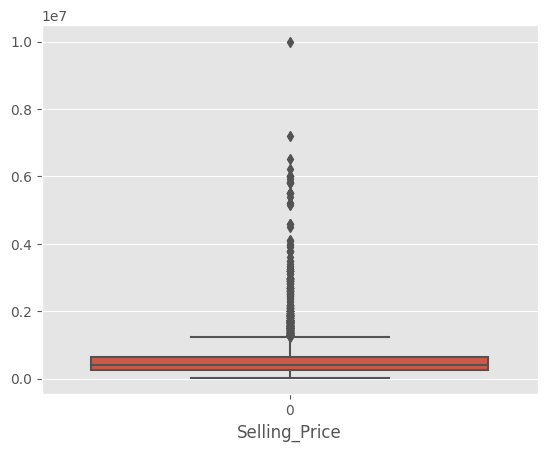

In [ ]:
sns.boxplot(carsDF['selling_price'])
plt.xlabel('Selling_Price')

##Hipotesis y preguntas

**HIPOTESIS:**

Por lo que se ve en los graficos se puede decir que hay ciertas correlaciones entre las columnas y el precio de los autos. Esto nos da una indicio de cuales caracteristicas tienen mas peso en el valor del auto pero no podemos afirmarlo todavia.

Tambien en los ultimos graficos podemos ver muchos valores outliers que hay que corregir a futuro.

**PREGUNTAS:**

Ahora que ya puedo ver estos graficos, quiero generar un proyecto de Data Science para predecir precios. Una de de mis preguntas es;

* Seran los datos extremos vistos en los graficos de bigote un problema para el modelo?
* Qué variables tendre en cuenta en la predicción de precios?


# V. Modelo de machine learning y encoding

In [ ]:
correlation = carsDF.corr()
correlation


<ipython-input-121-3fcd34e6f88a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = carsDF.corr()


,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427367,-0.387796,0.366694,-0.019074,0.159889,0.023632
selling_price,0.427367,1.000000,-0.161311,-0.108344,0.442857,0.692323,0.158111
km_driven,-0.387796,-0.161311,1.000000,-0.196494,0.253339,0.041770,0.207957
mileage,0.366694,-0.108344,-0.196494,1.000000,-0.578483,-0.378609,-0.459624
engine,-0.019074,0.442857,0.253339,-0.578483,1.000000,0.683506,0.657798
max_power,0.159889,0.692323,0.041770,-0.378609,0.683506,1.000000,0.259028
seats,0.023632,0.158111,0.207957,-0.459624,0.657798,0.259028,1.000000


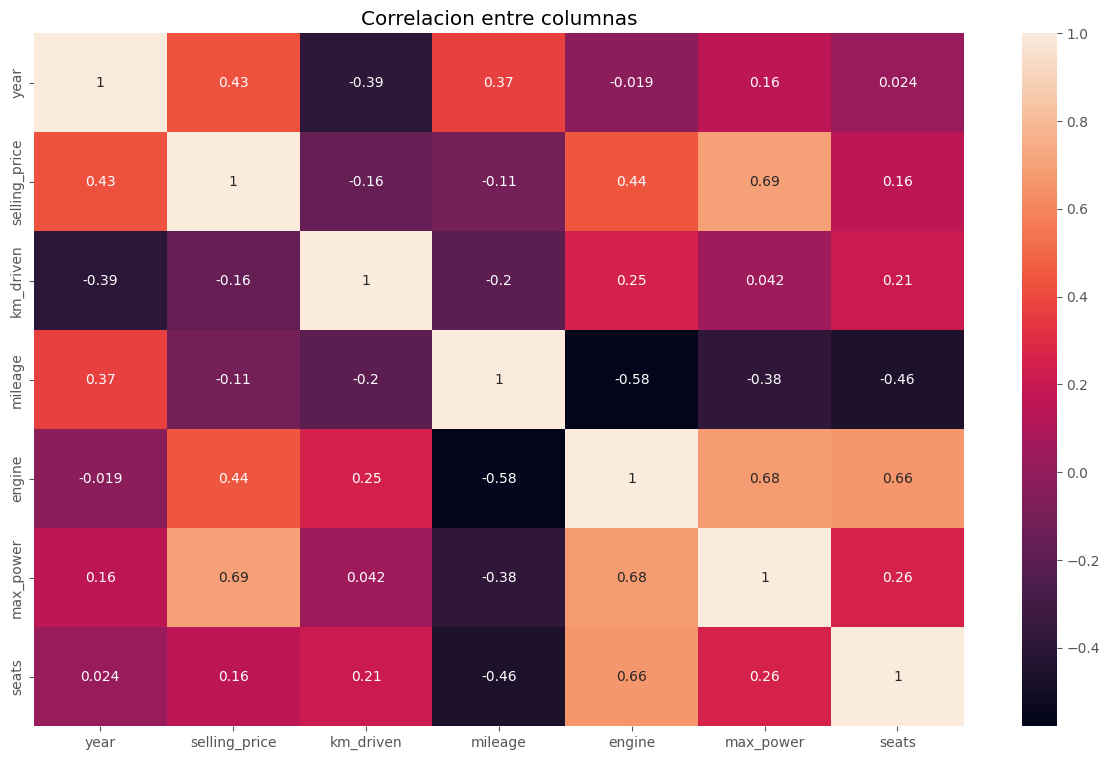

In [ ]:
# Heatmap
plt.figure(figsize=(15,9))
sns.heatmap(carsDF.corr(numeric_only=True), annot=True)
plt.title('Correlacion entre columnas')
plt.show()

In [ ]:
carsDF = carsDF.dropna()
x = carsDF.drop(columns=['selling_price'], axis=1)
x = pd.get_dummies(x)
y = carsDF['selling_price']

In [ ]:
x

,year,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,145500,23.40,1248,74.00,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
1,2014,120000,21.14,1498,103.52,5.0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
2,2006,140000,17.70,1497,78.00,5.0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
3,2010,127000,23.00,1396,90.00,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
4,2007,120000,16.10,1298,88.20,5.0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,2013,50000,18.90,998,67.10,5.0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
8122,2014,80000,22.54,1396,88.73,5.0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
8123,2013,110000,18.50,1197,82.85,5.0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
8124,2007,119000,16.80,1493,110.00,5.0,0,1,0,0,0,1,0,0,1,0,1,0,0,0


In [ ]:
print("Tamaño de x: ",x.shape)
print("Tamaño de y: ", y.shape)

Tamaño de x:  (6717, 20)
Tamaño de y:  (6717,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

scalar=MinMaxScaler()
X =scalar.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
print("Tamaño de x Test:", X_test.shape)
print("Tamaño de x Train:", X_train.shape)
print("Tamaño de y Test: ", y_test.shape)
print("Tamaño de y Train:", y_train.shape)

Tamaño de x Test: (1344, 20)
Tamaño de x Train: (5373, 20)
Tamaño de y Test:  (1344,)
Tamaño de y Train: (5373,)


In [ ]:
lr= LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))

0.648358175982082


In [ ]:
y_pred = lr.predict(X_test)
train_pred_lin=lr.predict(X_train)

print('R-Squared:',metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Squared: 0.6004244305621564
RMSE: 299344.5758714061


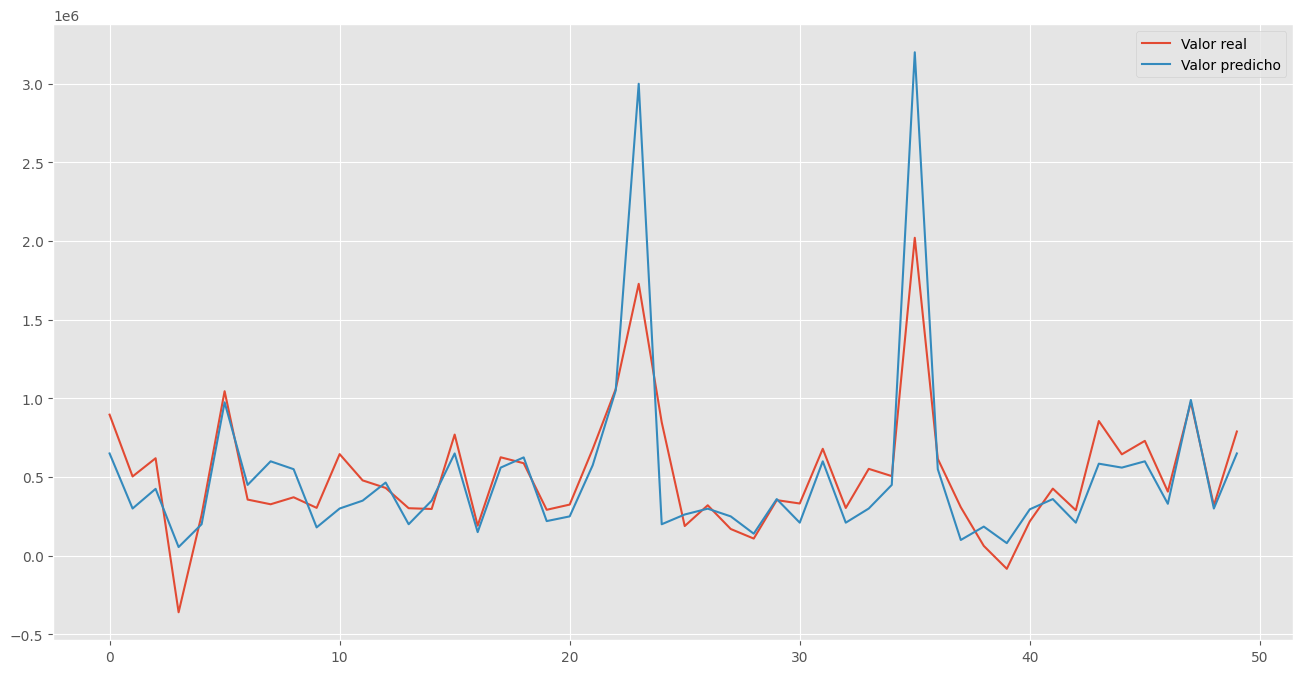

In [ ]:
test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Valor real','Valor predicho'])

## Conclusiones

Este primer modelado muestra un porcentaje de acierto del 64% lo que es relativamente malo. A raiz de esto, voy a analizar las hipotesis hechas previamente para ver si hay algun acierto en esto y continuar con data wrangling

# VI. Data Wrangling

Vimos en los graficos previamente muchos outliers que pueden estar afectando al modelo

Text(0.5, 0, 'Selling_Price')

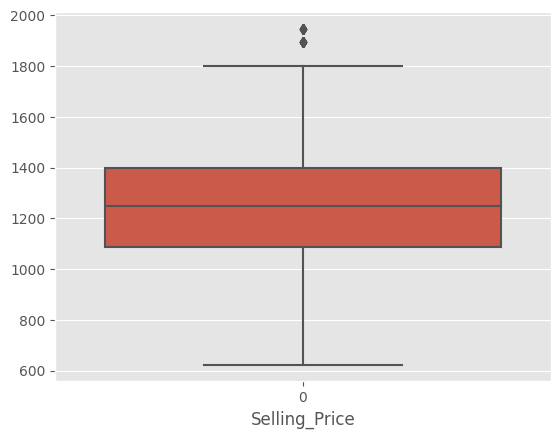

In [ ]:
Q1 = carsDF['engine'].quantile(0.25)
Q3 = carsDF['engine'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

carsDF[carsDF['engine']> upper_limit]
carsDF[carsDF['engine']< lower_limit]

carsDF = carsDF[carsDF['engine'] < upper_limit]

sns.boxplot(carsDF['engine'])
plt.xlabel('Selling_Price')

Text(0.5, 0, 'Selling_Price')

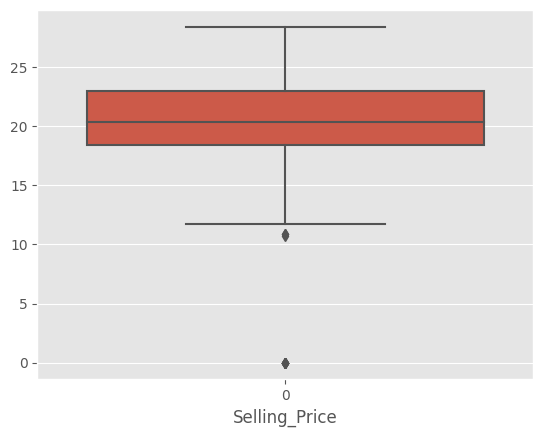

In [ ]:
Q1 = carsDF['mileage'].quantile(0.25)
Q3 = carsDF['mileage'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

carsDF[carsDF['mileage']> upper_limit]
carsDF[carsDF['mileage']< lower_limit]

carsDF = carsDF[carsDF['mileage'] < upper_limit]


sns.boxplot(carsDF['mileage'])
plt.xlabel('Selling_Price')

Text(0.5, 0, 'Selling_Price')

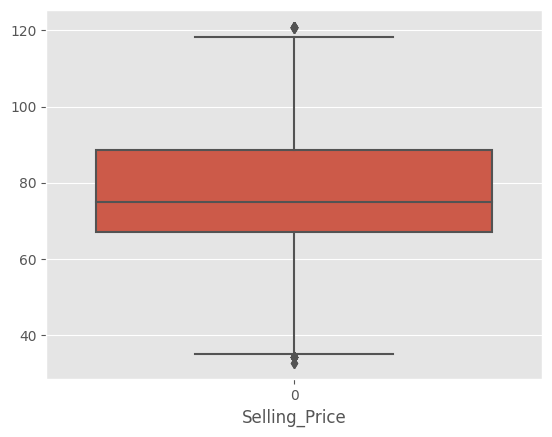

In [ ]:
Q1 = carsDF['max_power'].quantile(0.25)
Q3 = carsDF['max_power'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

carsDF[carsDF['max_power']> upper_limit]
carsDF[carsDF['max_power']< lower_limit]

carsDF = carsDF[carsDF['max_power'] < upper_limit]

sns.boxplot(carsDF['max_power'])
plt.xlabel('Selling_Price')

Text(0.5, 0, 'Selling_Price')

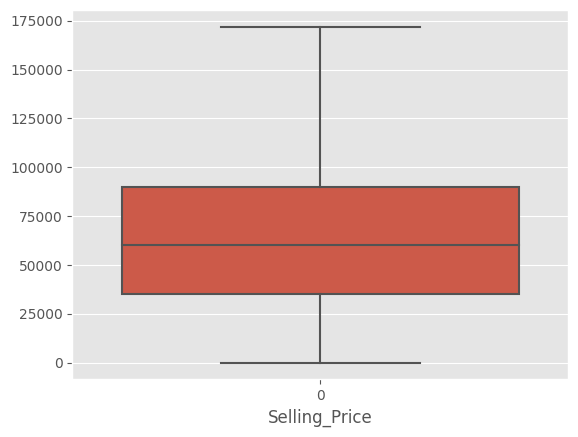

In [ ]:
Q1 = carsDF['km_driven'].quantile(0.25)
Q3 = carsDF['km_driven'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

carsDF[carsDF['km_driven']> upper_limit]
carsDF[carsDF['km_driven']< lower_limit]

carsDF = carsDF[carsDF['km_driven'] < upper_limit]

sns.boxplot(carsDF['km_driven'])
plt.xlabel('Selling_Price')

Text(0.5, 0, 'Selling_Price')

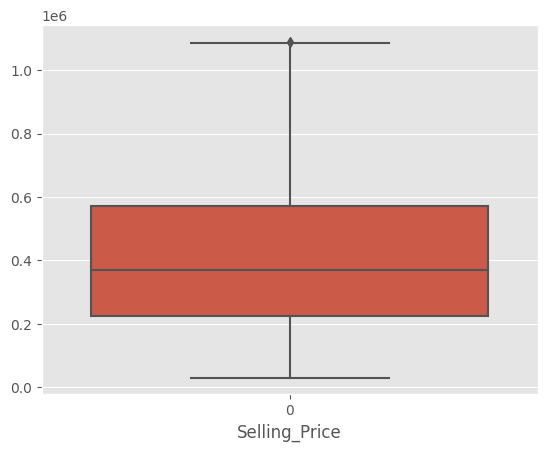

In [ ]:
Q1 = carsDF['selling_price'].quantile(0.25)
Q3 = carsDF['selling_price'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

carsDF[carsDF['selling_price']> upper_limit]
carsDF[carsDF['selling_price']< lower_limit]

carsDF = carsDF[carsDF['selling_price'] < upper_limit]

sns.boxplot(carsDF['selling_price'])
plt.xlabel('Selling_Price')

In [ ]:
correlation = carsDF.corr()
correlation


<ipython-input-136-3fcd34e6f88a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = carsDF.corr()


,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.727428,-0.468048,0.443671,0.092714,0.289751,0.173404
selling_price,0.727428,1.000000,-0.332019,0.350145,0.399273,0.581425,0.222495
km_driven,-0.468048,-0.332019,1.000000,-0.096008,0.236824,0.017760,0.023998
mileage,0.443671,0.350145,-0.096008,1.000000,-0.092882,-0.054663,-0.092900
engine,0.092714,0.399273,0.236824,-0.092882,1.000000,0.799610,0.206388
max_power,0.289751,0.581425,0.017760,-0.054663,0.799610,1.000000,0.170736
seats,0.173404,0.222495,0.023998,-0.092900,0.206388,0.170736,1.000000


Podemos ver mejoras de las correlaciones

# VII. Data Storytelling

Desde el inicio, nos sumergimos en una vasta colección de datos sobre automóviles, contemplando características técnicas e historiales de ventas. Trabajamos en la transformación de estos datos en información valiosa, seleccionando cuidadosamente las variables que más impactan en los precios.
Mediante un enfoque llamado regresión lineal, establecemos relaciones matemáticas entre las variables y los precios. Esto nos brinda una "fórmula" que nos permite entender cómo las características específicas influyen en los precios.
¿Cómo nos beneficia esto? Imagina que deseamos establecer el precio de un nuevo modelo. Con nuestro modelo, podemos ingresar sus detalles y obtener una estimación. Esto también se aplica a vehículos usados: un recurso vital al planificar estrategias comerciales y tomar decisiones informadas para la venta de estos.
En esencia, nuestro proyecto de Predicción de Precios de Automóviles es la fusión de tecnología y estrategia. Al centrarnos en datos, ciencia y análisis, estamos creando un puente entre la innovación y la toma de decisiones inteligentes.


# VIII. Insights


*   Sorpresivamente todas las variables (caracteristicas de los automoviles) fueron utilizadas en el modelo ya que consideramos que su correlacion fue lo suficiente buena como para entender los precios.

*   Los outliers siempre son un problema, por eso, decido trabajarlos para asi ajustar el modelo y que su nivel de acierto tal vez se incremente.
Al trabajar los outliers tambien me encontre con qque las correlaciones entre las variables aumentaron en relacion al precio de venta, por eso es un acierto decir que los outliers afectaron el modelo de prediccion.





# IX. Modelo de machine learning V.2

Ahora con los outliers trabajados decido hacer nuevamente el modelo para ver si este mejoro sin necesidad de buscar otro tipo de modelo aunque posteriormente lo realizare.

In [ ]:
carsDF = carsDF.dropna()
x = carsDF.drop(columns=['selling_price'], axis=1)
x = pd.get_dummies(x)
y = carsDF['selling_price']

In [ ]:
print("Tamaño de x: ",x.shape)
print("Tamaño de y: ", y.shape)

Tamaño de x:  (5116, 19)
Tamaño de y:  (5116,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

scalar=MinMaxScaler()
X =scalar.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
print("Tamaño de x Test:", X_test.shape)
print("Tamaño de x Train:", X_train.shape)
print("Tamaño de y Test: ", y_test.shape)
print("Tamaño de y Train:", y_train.shape)

Tamaño de x Test: (1024, 19)
Tamaño de x Train: (4092, 19)
Tamaño de y Test:  (1024,)
Tamaño de y Train: (4092,)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_train,y_train))

0.7390889591564522


In [ ]:
y_pred = model.predict(X_test)
train_pred_lin=model.predict(X_train)

print('R-Squared:',metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Squared: 0.7329216542621098
RMSE: 116070.91642176468


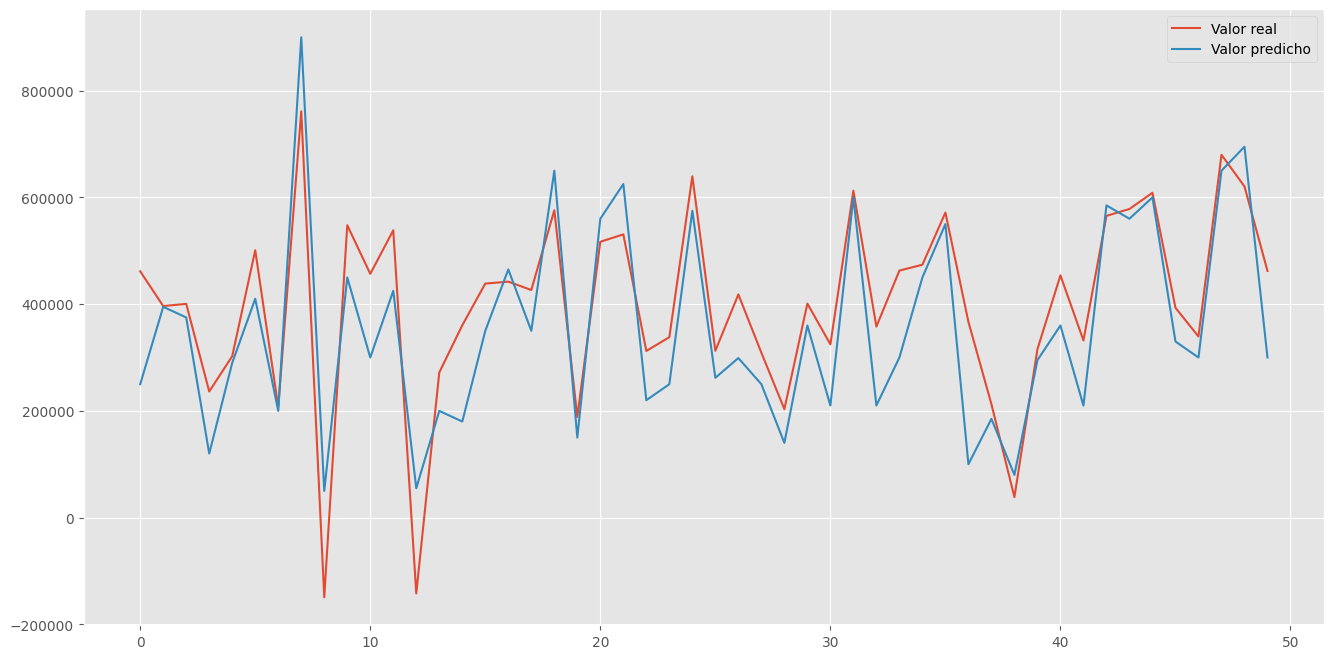

In [ ]:
test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Valor real','Valor predicho'])

Ahora podemos observar que si bien el modelo esta solo con 73% de aciertos ya no hay predicciones anormales ni datos reales como outliers. Esto es lo que hizo que el modelo mejore un 10%.

A futuro me gustaria realizar dos modelos nuevos, uno que sea un random forest y otro que sea un arbol de decision.

# API

In [ ]:
import requests

url = 'https://api.mercadolibre.com/sites/MLA/search?q=ford&category_id=MLA1743'
response = requests.get(url)
data = response.json()

results = data.get('results', [])
rows = []

for result in results:
    title = result.get('title', 'N/A')
    price = result.get('price', 'N/A')

    attributes = result.get('attributes', [])
    attributes_dict = {}
    for attribute in attributes:
        attribute_id = attribute.get('id')
        if attribute_id:
            attributes_dict[attribute_id] = attribute.get('value_name', 'N/A')

    row = {
        'Title': title,
        'Price': price,
        **attributes_dict
    }
    rows.append(row)

# Crear DataFrame
dfApi = pd.DataFrame(rows)

In [ ]:
dfApi

,Title,Price,ITEM_CONDITION,SINGLE_OWNER,TRACTION_CONTROL,HAS_AIR_CONDITIONING,ENGINE_DISPLACEMENT,PASSENGER_CAPACITY,BRAND,DOORS,ENGINE,FUEL_TYPE,KILOMETERS,MODEL,TRANSMISSION,TRIM,VEHICLE_YEAR,LENGTH,POWER
0,Ford Focus L/14 2.0 4 P Se Plus At Powershift ...,6600000,Usado,No,Delantera,Sí,1999 cc,5,Ford,4,2,Nafta,97987 km,Focus III,Automática,2.0 Se Plus Mt,2015,NaN,NaN
1,Ford Ecosport Titanium 2.0 At Año 2017 - Liv M...,7000000,Usado,NaN,4x2,NaN,2 L,5,Ford,5,2.0,Nafta,79000 km,Ecosport,Automática,2.0 Titanium Powershift 143cv 4x2,2017,4241 mm,143 hp
2,Ford K S 5 Puertas 2020 Ugarcia Us,6500000,Usado,NaN,Delantera,NaN,1.5 L,5,Ford,5,1.5,Nafta,20600 km,Ka,Manual,1.5 S 5 p,2020,3969 mm,123 hp
3,Ford Ecosport 1.5 Se 2017 / 65.000km Unico Due...,12000,Usado,NaN,4x2,Sí,1.5 L,5,Ford,5,1.5,Nafta,65000 km,Ecosport,Manual,1.5 Se 123cv 4x2,2017,4241 mm,123 hp
4,Ford Ka S 2021 - Brian Avalos,6500000,Usado,NaN,Delantera,NaN,1.5 L,5,Ford,5,1.5,Nafta,20612 km,Ka,Manual,1.5 S 5 p,2021,3969 mm,123 hp
5,Ford Ecosport Titanium 1.5 At 2022 12.000km,17900,Usado,NaN,4x2,Sí,1496 cc,5,Ford,5,1.5,Nafta,12000 km,Ecosport,Automática,1.5 Titanium 123cv 4x2 Automática,2022,4241 mm,123 hp
6,Ford Mondeo 2018 2.0 Titanium Ecoboost At 240c...,24499,Usado,No,Delantera,Sí,2 L,5,Ford,4,2.0,Nafta,73000 km,Mondeo,Automática,2.0 Titanium Ecoboost At 240cv,2018,4844 mm,240 hp
7,Ford Territory 2022 1.5t Titanium No Mondeo Co...,34899,Usado,No,Delantera,Sí,1.5 L,5,Ford,5,1.5,Nafta,4000 km,Territory,Automática,1.5t Titanium,2022,4580 mm,143 hp
8,Ford Ranger 2020 3.2 Cd Limited Tdci 200cv Aut...,25899,Usado,No,4x4,Sí,3.2 L,5,Ford,4,3.2,Diésel,145000 km,Ranger,Automática,3.2 Cd Limited Tdci 200cv Automática,2020,5359 mm,200 hp
9,Ford Kuga Sel Automatica 2019 Ugarcia Us,10900000,Usado,NaN,Delantera,NaN,2 L,5,Ford,5,2.0,Nafta,107000 km,Kuga,Automática,2.0 Sel,2019,4524 mm,240 hp




---


***Una vez obtenido los datos de la api necesito trabajarlos para poder utilizarlos en mi proyecto***


---




In [ ]:
dfpruebas = dfApi.drop(columns = ['Title', 'Price', 'ITEM_CONDITION', 'TRACTION_CONTROL', 'HAS_AIR_CONDITIONING', 'BRAND', 'DOORS', 'ENGINE', 'MODEL', 'TRIM', 'LENGTH']).reset_index(drop=True)

In [ ]:
dfpruebas

,SINGLE_OWNER,ENGINE_DISPLACEMENT,PASSENGER_CAPACITY,FUEL_TYPE,KILOMETERS,TRANSMISSION,VEHICLE_YEAR,POWER
0,No,1999 cc,5,Nafta,97987 km,Automática,2015,NaN
1,NaN,2 L,5,Nafta,79000 km,Automática,2017,143 hp
2,NaN,1.5 L,5,Nafta,20600 km,Manual,2020,123 hp
3,NaN,1.5 L,5,Nafta,65000 km,Manual,2017,123 hp
4,NaN,1.5 L,5,Nafta,20612 km,Manual,2021,123 hp
5,NaN,1496 cc,5,Nafta,12000 km,Automática,2022,123 hp
6,No,2 L,5,Nafta,73000 km,Automática,2018,240 hp
7,No,1.5 L,5,Nafta,4000 km,Automática,2022,143 hp
8,No,3.2 L,5,Diésel,145000 km,Automática,2020,200 hp
9,NaN,2 L,5,Nafta,107000 km,Automática,2019,240 hp


In [ ]:
import random
# Función para convertir la nomenclatura a mililitros
def convert_to_milliliters(nomenclature):
    parts = nomenclature.split()
    if len(parts) == 2 and parts[1] == 'L':
        liters = float(parts[0])
        milliliters = int(liters * 1000)
        return milliliters
    return None

# Función para generar valores aleatorios para no propietario único
def random_owner():
    owners = ["First Owner", "Second Owner", "Third Owner", "Fourth & Above Owner"]
    return random.choice(owners)

# Función para mapear los valores de combustible
def map_fuel_type(value):
    if value in ["Nafta", "Nafta/GNC"]:
        return "Petrol"
    elif value == "Diésel":
        return "Diesel"
    else:
        return value

# Función para mapear los valores de trasmision
def map_trasmission_type(value):
    if value == "Automática":
        return "Automatic"
    elif value == "Manual":
        return "Manual"
    else:
        return value



In [ ]:
dfpruebas['engine'] = dfpruebas['ENGINE_DISPLACEMENT'].apply(convert_to_milliliters)
dfpruebas = dfpruebas.dropna().reset_index(drop=True)
dfpruebas['engine'] = dfpruebas['engine'].astype('int')
dfpruebas = dfpruebas.drop(columns = ['ENGINE_DISPLACEMENT']).reset_index(drop=True)

In [ ]:
dfpruebas['owner'] = dfpruebas['SINGLE_OWNER'].apply(lambda x: random_owner())
dfpruebas = dfpruebas.drop(columns = ['SINGLE_OWNER']).reset_index(drop=True)

In [ ]:
dfpruebas['fuel'] = dfpruebas['FUEL_TYPE'].apply(map_fuel_type)
dfpruebas = dfpruebas.drop(columns = ['FUEL_TYPE']).reset_index(drop=True)

In [ ]:
dfpruebas['km_driven']=dfpruebas['KILOMETERS'].replace(' km','',regex=True).str.replace(',', '')
dfpruebas = dfpruebas.drop(columns = ['KILOMETERS']).reset_index(drop=True)

In [ ]:
dfpruebas['transmission'] = dfpruebas['TRANSMISSION'].apply(map_trasmission_type)
dfpruebas = dfpruebas.drop(columns = ['TRANSMISSION']).reset_index(drop=True)

In [ ]:
dfpruebas['max_power']=dfpruebas['POWER'].replace(' hp','',regex=True).str.replace(',', '')
dfpruebas = dfpruebas.drop(columns = ['POWER']).reset_index(drop=True)

In [ ]:
dfpruebas = dfpruebas.rename(columns={'PASSENGER_CAPACITY' : 'seats', 'VEHICLE_YEAR': 'year'})

In [ ]:
dfpruebas['km_driven'] = pd.to_numeric(dfpruebas['km_driven'])
dfpruebas['engine'] = pd.to_numeric(dfpruebas['engine'])
dfpruebas['max_power'] = pd.to_numeric(dfpruebas['max_power'])
dfpruebas['year'] = pd.to_numeric(dfpruebas['year'])
dfpruebas['seats'] = pd.to_numeric(dfpruebas['seats'])

Agrego las columnas que no me trae la API para poder continuar con la idea y la prueba

In [ ]:
dfpruebas['seller_type'] = 'Individual'
mileage_values = np.random.uniform(16.10, 23.40, size=len(dfpruebas))
dfpruebas['mileage'] = mileage_values.round(2)

In [ ]:
dfpruebas

,seats,year,engine,owner,fuel,km_driven,transmission,max_power,seller_type,mileage
0,5,2018,2000,First Owner,Petrol,73000,Automatic,240,Individual,18.88
1,5,2022,1500,Fourth & Above Owner,Petrol,4000,Automatic,143,Individual,16.63
2,5,2020,3200,Fourth & Above Owner,Diesel,145000,Automatic,200,Individual,23.06
3,5,2018,2000,Second Owner,Petrol,74000,Automatic,240,Individual,20.25
4,5,2022,1500,First Owner,Petrol,4000,Automatic,143,Individual,16.78
5,5,2013,1600,Fourth & Above Owner,Petrol,112000,Manual,125,Individual,20.26
6,5,2022,1500,Fourth & Above Owner,Petrol,4000,Automatic,143,Individual,19.12
7,5,2023,2000,First Owner,Petrol,1000,Automatic,253,Individual,22.51
8,5,2013,1600,Third Owner,Petrol,99000,Manual,125,Individual,16.32
9,5,2019,2000,Third Owner,Petrol,78000,Automatic,170,Individual,17.62


In [ ]:
dfpruebas = dfpruebas.dropna()
test = pd.get_dummies(dfpruebas)

In [ ]:
test

,seats,year,engine,km_driven,max_power,mileage,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner,fuel_Diesel,fuel_Petrol,transmission_Automatic,transmission_Manual,seller_type_Individual
0,5,2018,2000,73000,240,18.88,1,0,0,0,0,1,1,0,1
1,5,2022,1500,4000,143,16.63,0,1,0,0,0,1,1,0,1
2,5,2020,3200,145000,200,23.06,0,1,0,0,1,0,1,0,1
3,5,2018,2000,74000,240,20.25,0,0,1,0,0,1,1,0,1
4,5,2022,1500,4000,143,16.78,1,0,0,0,0,1,1,0,1
5,5,2013,1600,112000,125,20.26,0,1,0,0,0,1,0,1,1
6,5,2022,1500,4000,143,19.12,0,1,0,0,0,1,1,0,1
7,5,2023,2000,1000,253,22.51,1,0,0,0,0,1,1,0,1
8,5,2013,1600,99000,125,16.32,0,0,0,1,0,1,0,1,1
9,5,2019,2000,78000,170,17.62,0,0,0,1,0,1,1,0,1


Ahora con este dataframe, en un futuro, se puede usar para hacer pruebas para la prediccion de precios